In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [27]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [28]:
df = pd.DataFrame(data.data , columns= data.feature_names)

In [29]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
df.shape

(20640, 8)

In [31]:
X = df
y = data.target

In [32]:
y = pd.DataFrame(data.target , columns= ['Price'])

In [33]:
y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.3 , random_state=1)

In [35]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5748,2.9148,15.0,4.285957,1.105532,3164.0,2.692766,34.16,-118.27
5592,3.1779,41.0,4.394737,1.054825,1658.0,3.635965,33.80,-118.26
2110,2.5111,49.0,4.886792,0.964361,1290.0,2.704403,36.75,-119.75
13901,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56
18425,4.5033,7.0,5.291789,1.101173,1739.0,2.549853,37.26,-121.83
...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [36]:
y_train

,Price
5748,2.38700
5592,1.71100
2110,0.55400
13901,0.69600
18425,2.13100
...,...
10955,2.05300
17289,5.00001
5192,1.04800
12172,1.40700


In [37]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [38]:
model

DecisionTreeRegressor()

In [39]:
model.fit(X_train , y_train)

DecisionTreeRegressor()

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred

array([2.25 , 0.617, 2.296, ..., 1.047, 1.397, 2.08 ])

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.6180493394534523

Hyper Parameter Tuning

In [43]:
parametr = {
    'criterion' : ['squared_error' , 'absolute_error' , 'friedman_mse'],
    'splitter' : ['best' , 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'max_features' : ['auto' , 'log2' , 'sqrt']
}

In [45]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gsc = GridSearchCV(dtr , param_grid= parametr , cv=5 , verbose = 3 , scoring = 'neg_mean_squared_error')

In [46]:
gsc.fit(X_train , y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] EN

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [47]:
gsc.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [55]:
final_model = DecisionTreeRegressor(criterion = 'friedman_mse' , max_depth = 10 , max_features= 'log2' , splitter= 'best')

In [52]:
final_model

DecisionTreeRegressor(criterion='friedam_mse', max_depth=10,
                      max_features='log2')

In [56]:
final_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      max_features='log2')

In [57]:
y_pred = final_model.predict(X_test)

In [58]:
y_pred

array([3.74465826, 0.70719048, 2.47496667, ..., 1.13156019, 1.13156019,
       2.47822469])

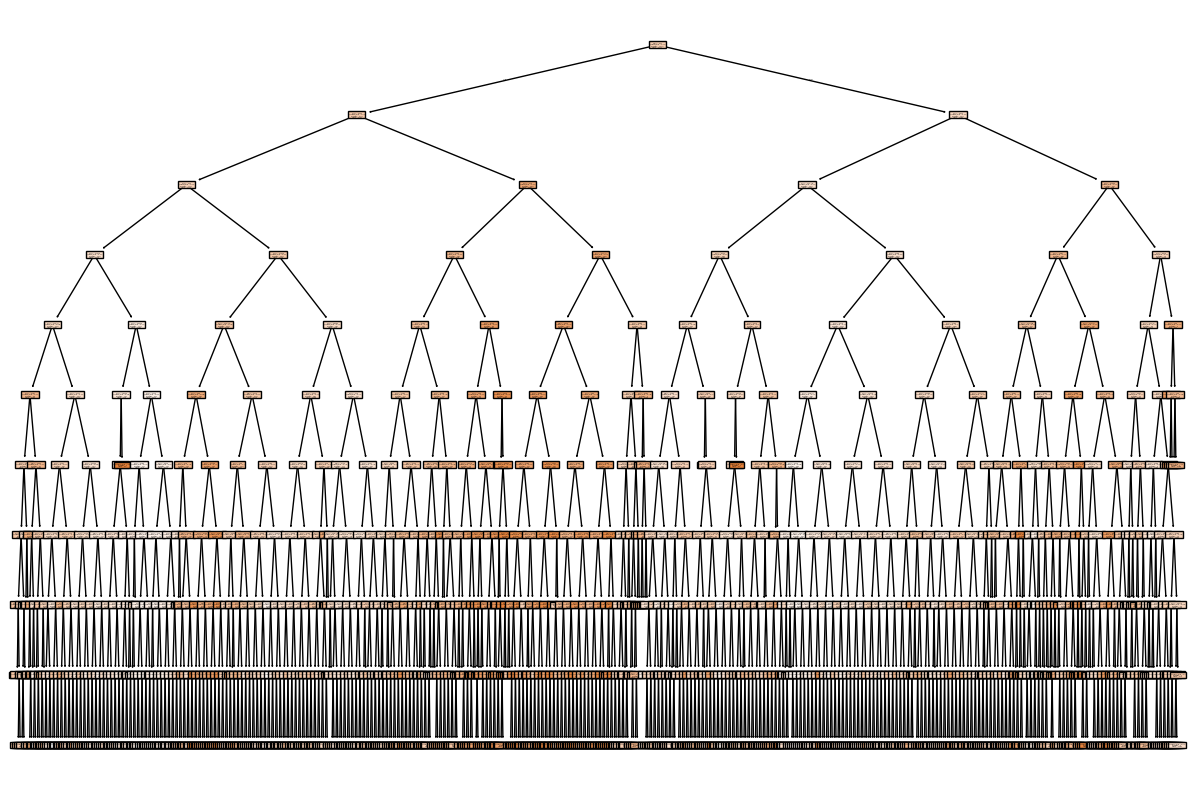

In [59]:
from sklearn import tree
plt.figure(figsize = (15 , 10))
tree.plot_tree(final_model , filled= True)
plt.show()

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.6672303080724881

In [63]:
new = pd.DataFrame({'Actual' : y_test['Price'] , 'Predicted' : y_pred})

In [64]:
new

,Actual,Predicted
4712,3.550,3.744658
2151,0.707,0.707190
15927,2.294,2.474967
82,1.125,1.097122
8161,2.254,3.787815
...,...,...
11387,2.113,2.462411
2523,0.875,1.048617
18897,1.098,1.131560
18878,1.625,1.131560


from matplotlib import pyplot as plt
new['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

In [67]:
error = y_test['Price'] - pd.Series(y_pred, index=y_test.index)

In [68]:
error

,0
4712,-0.194658
2151,-0.000190
15927,-0.180967
82,0.027878
8161,-1.533815
...,...
11387,-0.349411
2523,-0.173617
18897,-0.033560
18878,0.493440


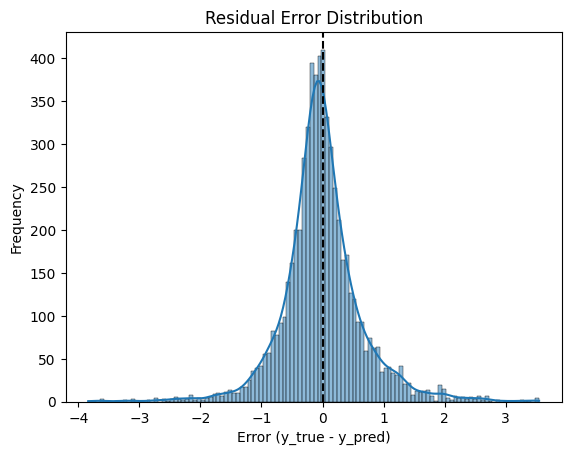

In [73]:
sns.histplot(error , kde = True)
plt.title("Residual Error Distribution")
plt.xlabel("Error (y_true - y_pred)")
plt.ylabel("Frequency")
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , y_pred)

0.4374866827311539